# Lab 8: Define and Solve an ML Problem of Your Choosing

In [13]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [14]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1) I chose the World Happiness Report data set.
2) I will be predicting the Life Ladder (measures life satisfaction) for a country in a given year. The label is this as well and is continous and numerical.
3) This is an supervised learning problem because we are training on labeled data. It is regression because the label is continous/numerical value (doesn't fall into discrete categories). 
4) Initially, my features are: GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect, Confidence in national government, Democratic Quality, Delivery Quality, Standard deviation of ladder by country-year, Standard deviation/Mean of ladder by country-year, GINI index (World Bank estimate), GINI index (World Bank estimate), average 2000-15, gini of household income reported in Gallup by wp5-year. 
5) This is an important problem because often international organizations/NGOs want to predict the happiness factor of a country (i.e. if the country people are contempt living there). This could also help politicians change their agenda, or companies/businesses/services change their approach.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [15]:
## use basic techniques to analyze the data
print(df.shape)
print(df.describe())

(1562, 19)
              year  Life Ladder  Log GDP per capita  Social support  \
count  1562.000000  1562.000000         1535.000000     1549.000000   
mean   2011.820743     5.433676            9.220822        0.810669   
std       3.419787     1.121017            1.184035        0.119370   
min    2005.000000     2.661718            6.377396        0.290184   
25%    2009.000000     4.606351            8.310665        0.748304   
50%    2012.000000     5.332600            9.398610        0.833047   
75%    2015.000000     6.271025           10.190634        0.904329   
max    2017.000000     8.018934           11.770276        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1553.000000                   1533.000000   
mean                          62.249887                      0.728975   
std                            7.960671                      0.145408   
min                           37.766476                  

In [16]:
print(df.dtypes)

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

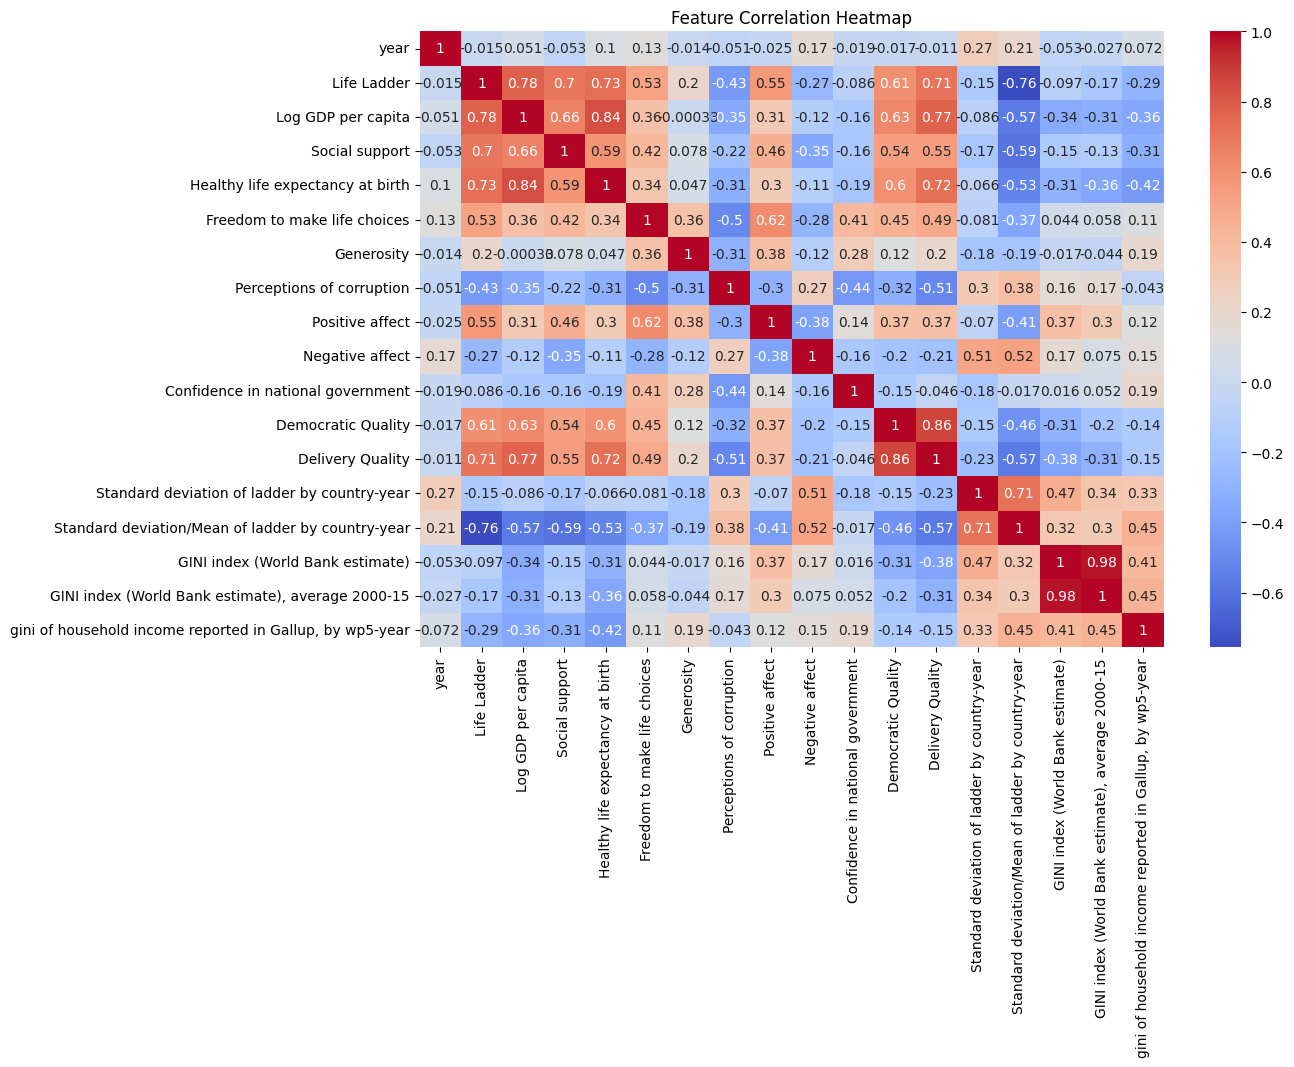

In [17]:
## correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## shows Confidence in national government, Standard deviation of ladder by country-year, and GINI index (World Bank estimate), average 2000-15 are weakly 
## correlated to the life ladder, so we can ignore these features
df.drop(columns=['Confidence in national government', 'Standard deviation of ladder by country-year',
    'GINI index (World Bank estimate), average 2000-15'], inplace=True)

## I handle outliers and plot distributions later on

In [18]:
## cleaning the data
## finding + replacing outliers in columns that can have extreme values
extreme_value_cols = ['Log GDP per capita', 'Social support', 'Generosity', 'Perceptions of corruption']
for col in extreme_value_cols:
    df[col + '_winsorized'] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])
    df.drop([col], axis=1, inplace=True)
    
nan_count = np.sum(df.isnull(), axis=0)
print(nan_count) ## for small missing counts, we can just impute with mean but otherwise, we should drop feature?

print(df.columns.tolist())

df.head(5)

country                                                       0
year                                                          0
Life Ladder                                                   0
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Positive affect                                              18
Negative affect                                              12
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation/Mean of ladder by country-year             0
GINI index (World Bank estimate)                            979
gini of household income reported in Gallup, by wp5-year    357
Log GDP per capita_winsorized                                27
Social support_winsorized                                     0
Generosity_winsorized                                        80
Perceptions of corruption_winsorized    

,country,year,Life Ladder,Healthy life expectancy at birth,Freedom to make life choices,Positive affect,Negative affect,Democratic Quality,Delivery Quality,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"gini of household income reported in Gallup, by wp5-year",Log GDP per capita_winsorized,Social support_winsorized,Generosity_winsorized,Perceptions of corruption_winsorized
0,Afghanistan,2008,3.723590,49.209663,0.718114,0.517637,0.258195,-1.929690,-1.655084,0.476600,NaN,NaN,7.168690,0.450662,0.181819,0.881686
1,Afghanistan,2009,4.401778,49.624432,0.678896,0.583926,0.237092,-2.044093,-1.635025,0.391362,NaN,0.441906,7.333790,0.552308,0.203614,0.850035
2,Afghanistan,2010,4.758381,50.008961,0.600127,0.618265,0.275324,-1.991810,-1.617176,0.394803,NaN,0.327318,7.386629,0.539075,0.137630,0.706766
3,Afghanistan,2011,3.831719,50.367298,0.495901,0.611387,0.267175,-1.919018,-1.616221,0.465942,NaN,0.336764,7.415019,0.521104,0.175329,0.731109
4,Afghanistan,2012,3.782938,50.709263,0.530935,0.710385,0.267919,-1.842996,-1.404078,0.475367,NaN,0.344540,7.517126,0.520637,0.247159,0.775620


In [19]:
# df.drop(['GINI index (World Bank estimate)', 'gini of household income reported in Gallup, by wp5-year'], axis=1, inplace=True)
columns_to_impute = [col for col in df.columns if col not in ['country', 'year', 'Life Ladder']]
## excluding columns with too many missing values or irrelevant ones
## all columns except country and year are already data type float

# for col in columns_to_impute:
#     df[col + '_na'] = df[col].isnull()

print(df.columns.tolist())

for col in columns_to_impute:
    df[col] = df[col].fillna(df[col].mean())
    
df.head(5)

nan_count = np.sum(df.isnull(), axis=0)
print(nan_count)

['country', 'year', 'Life Ladder', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Positive affect', 'Negative affect', 'Democratic Quality', 'Delivery Quality', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'gini of household income reported in Gallup, by wp5-year', 'Log GDP per capita_winsorized', 'Social support_winsorized', 'Generosity_winsorized', 'Perceptions of corruption_winsorized']
country                                                     0
year                                                        0
Life Ladder                                                 0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Positive affect                                             0
Negative affect                                             0
Democratic Quality                                          0
Delivery Quality                             

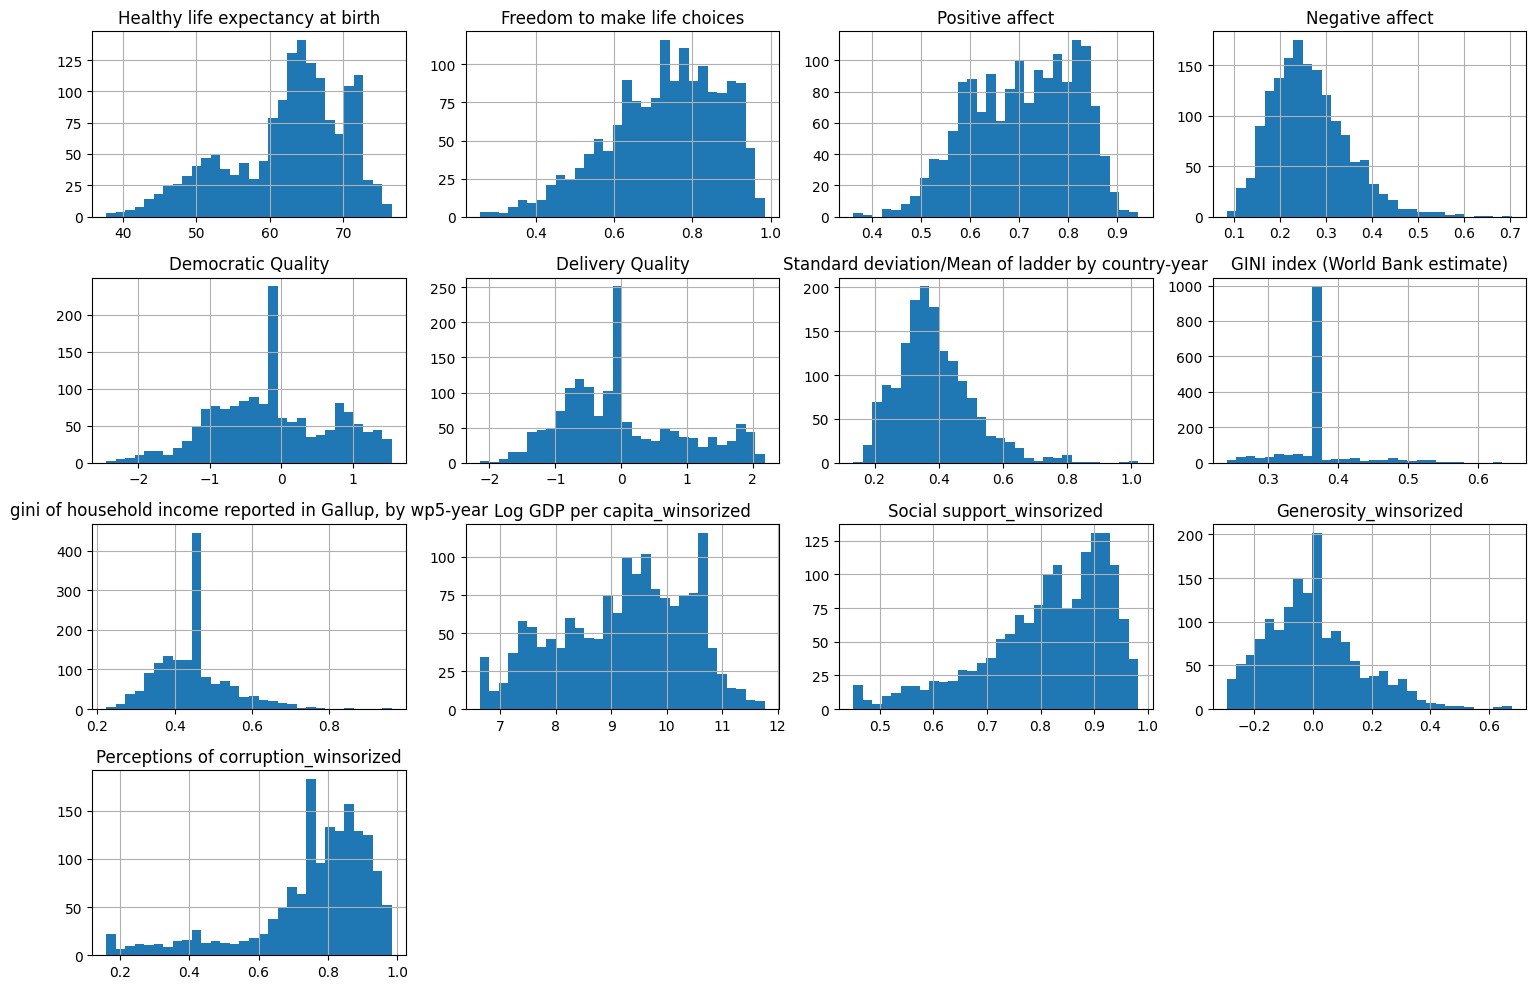

In [20]:
## see column data distributions
df[columns_to_impute].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## need to do the necessary normalization for each of these (min-max or standard scaling based on distribution)
min_max_cols = ['Social support_winsorized', 'Perceptions of corruption_winsorized', 'Freedom to make life choices', 'Negative affect']
min_max_scaler = MinMaxScaler()
for min_max_col in min_max_cols:
    df[min_max_col] = min_max_scaler.fit_transform(df[[min_max_col]])

standard_scale_cols = ['Log GDP per capita_winsorized', 'Healthy life expectancy at birth', 'Generosity_winsorized', 'Positive affect', 
                       'Democratic Quality', 'Delivery Quality', 
                       'Standard deviation/Mean of ladder by country-year']

standard_scaler = StandardScaler()
for standard_col in standard_scale_cols:
    df[standard_col] = standard_scaler.fit_transform(df[[standard_col]])

answers to some questions to consider!!

I would like to use a basic Linear Regression model first, and then maybe a Decision Tree, KNN, Stacking, and Random Forest Regressor or Gradient Boosting Regressor to make the model understand more complex relationships. I already handled data preparation above (cleaning data, handling outliers / missing values, feature selection, scaling data, etc.). To help evaluate my model performance, I want to split my dataset into training and test sets, and utilize cross-validation. As metrics, I will then use R^2 scores and RMSE.

In [21]:

## delete the non winsorized columns
##df.drop(['Generosity', 'Log GDP per capita', 'Social support', 'Perceptions of corruption'], axis=1, inplace=True)

print(list(df.columns))

['country', 'year', 'Life Ladder', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Positive affect', 'Negative affect', 'Democratic Quality', 'Delivery Quality', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'gini of household income reported in Gallup, by wp5-year', 'Log GDP per capita_winsorized', 'Social support_winsorized', 'Generosity_winsorized', 'Perceptions of corruption_winsorized']


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1) Yes, my feature list changed after I cleaned my data and did feature selection. They are now: 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Positive affect', 'Negative affect', 'Democratic Quality', 'Delivery Quality', 'Standard deviation/Mean of ladder by country-year', 'Log GDP per capita_winsorized', 'Social support_winsorized', 'Generosity_winsorized', 'Perceptions of corruption_winsorized'. 

2) To prepare my data for modeling, I handled outliers using winsorization, normalized/scaled data accordingly, and dropped features I thought were unnecessary.

3) As I mentioned previously, I would like to use a basic Linear Regression model first, and then a Decision Tree / K Nearest Neighbors Regressor and then a Stacking ensemble model with all three. If time, I will try out a Gradient Boosting Decision Tree and Random Forest model to help analyze more complex relationships.

4) After splitting the data into training/testing sets, I want to utilize cross-validation. I would like to tune the hyperparameters with GridSearchCV. I will do these steps for each model. I will then use evaluative metrics such as R^2 scores and RMSE to compare model performances, and select the best one. If needed to improve performance, I will consider stacking / ensemble models.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [47]:
df.isnull().sum().sum()

0

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [23]:
## basic linear regression
y = df['Life Ladder'] 
X = df.drop(columns = ['Life Ladder', 'country', 'year'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_lr_pred = lr_model.predict(X_test)

lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)

lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.45724853176856517
[LR] R2: 0.8377465753523258


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
### train, test, eval decision tree
param_grid = {'max_depth': [4, 8], 'min_samples_leaf': [25, 50]}

dt_regressor = DecisionTreeRegressor()
dt_grid = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train, y_train)
print("done running grid search for decision tree")

rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT))

dt_best_params = dt_grid_search.best_params_

dt_best_params

dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)
dt_model.fit(X_train, y_train)

y_dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)
print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

done running grid search for decision tree
[DT] RMSE for the best model is : 0.48
[DT] Root Mean Squared Error: 0.4313551029905661
[DT] R2: 0.8556026865271973


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

knn_reg = KNeighborsRegressor()
knn_grid = GridSearchCV(estimator=knn_reg, param_grid=param_grid_knn, cv=3, scoring='neg_root_mean_squared_error')
knn_grid_search = knn_grid.fit(X_train, y_train)
print("done running grid search for knn")

rmse_KNN = -1 * knn_grid_search.best_score_
print("[KNN] RMSE for the best model is : {:.2f}".format(rmse_KNN))

knn_best_params = knn_grid_search.best_params_

knn_best_params

knn_model = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn_model.fit(X_train, y_train)

y_knn_pred = knn_model.predict(X_test)
knn_rmse = mean_squared_error(y_test, y_knn_pred, squared=False)
knn_r2 = r2_score(y_test, y_knn_pred)
print('[KNN] Root Mean Squared Error: {0}'.format(knn_rmse))
print('[KNN] R2: {0}'.format(knn_r2))

done running grid search for knn
[KNN] RMSE for the best model is : 0.38
[KNN] Root Mean Squared Error: 0.36134414567931383
[KNN] R2: 0.8986715781714975


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
## train, test, eval stacking model with decision tree regressor + linear regressor + knn regressor
estimators = [("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)),
              ("LR", LinearRegression()), ("KNN", KNeighborsRegressor(n_neighbors=3, weights='distance'))
             ]

stacking_model = StackingRegressor(estimators=estimators, passthrough=False)
stacking_model.fit(X_train, y_train)
print('fit stacking model')

stacking_pred = stacking_model.predict(X_test)
stack_rmse = mean_squared_error(y_test, stacking_pred, squared=False)
stack_r2 = r2_score(y_test, stacking_pred) 
print('Root Mean Squared Error: {0}'.format(stack_rmse))
print('R2: {0}'.format(stack_r2))      

fit stacking model
Root Mean Squared Error: 0.3333908162380089
R2: 0.9137425733418738


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
## train, test, eval GBDT model (ensemble)
gbdt_model = GradientBoostingRegressor(max_depth=2, n_estimators=300)
gbdt_model.fit(X_train, y_train)
print('fit GBDT model')

y_gbdt_pred = gbdt_model.predict(X_test)
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred) 

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))      

fit GBDT model
[GBDT] Root Mean Squared Error: 0.3444390098486329
[GBDT] R2: 0.9079309001573169


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
## train, test, eval random forest model (ensemble)
rf_model = RandomForestRegressor(max_depth=32, n_estimators=300)
rf_model.fit(X_train, y_train)
print('fit random forest model')

y_rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred) 

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))          

fit random forest model
[RF] Root Mean Squared Error: 0.32663806634663584
[RF] R2: 0.917201432179167


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


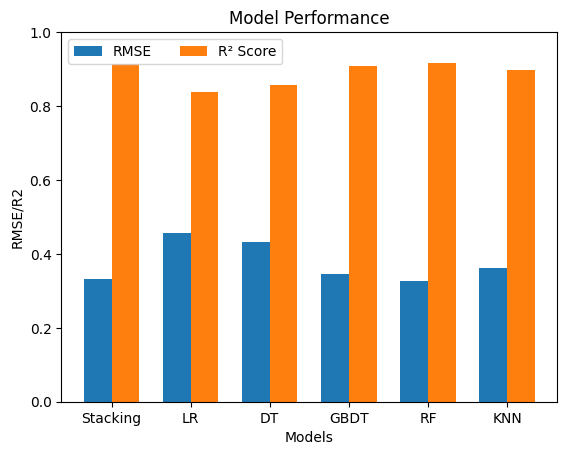

0.9137425733418738
0.917201432179167


In [44]:
## compare the model performances
RMSE_Results = [stack_rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse, knn_rmse]
R2_Results = [stack_r2, lr_r2, dt_r2, gbdt_r2, rf_r2, knn_r2]

rg= np.arange(6)
width = 0.35

# 1. Create bar plot with RMSE results
plt.bar(rg, RMSE_Results, width, label='RMSE')

# 2. Create bar plot with R2 results
plt.bar(rg + width, R2_Results, width, label='R² Score')


labels = ['Stacking','LR', 'DT', 'GBDT', 'RF', 'KNN']
plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("RMSE/R2")


plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

Observing the RMSE/R2 scores between the different models (Stacking / LR / KNN / DT / GBDT / RF), we can see that LR and DT are the worst performing, followed by GDBT and KNN, and then finally RF and Stacking are the best performing. We know RF and Stacking are best performing because the R2 scores are highest for these, and RMSE values are lowest for these. Between the two, RF is doing slightly better, so I will choose that as the optimal model. 

Also, running the code cell below, I found that my random forest model is not underfitting because the R2 scores for the training and testing set are similar. It is slightly overfitting (but not too much) because the training set has less error than the testing set.

In [40]:
## to look at overfitting/underfitting
y_rf_train_pred = rf_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_rf_train_pred, squared=False)
train_r2 = r2_score(y_train, y_rf_train_pred)

print("[RF] Train RMSE:", train_rmse)
print("[RF] Train R²:", train_r2)
print("[RF] Test RMSE:", rf_rmse)
print("[RF] Test R²:", rf_r2)

[RF] Train RMSE: 0.12488063722465528
[RF] Train R²: 0.9874409533681453
[RF] Test RMSE: 0.32663806634663584
[RF] Test R²: 0.917201432179167


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
## show some sample predictions for life ladder and the actual values (they are very close!)

X_first_five = X_test.iloc[:5]
y_preds = rf_model.predict(X_first_five)

new_df = pd.DataFrame({
    'Predicted': y_preds,
    'Actual': y_test.iloc[:5].values
})
print(new_df)

   Predicted    Actual
0   5.809225  5.806782
1   4.410389  4.028690
2   7.130164  7.614929
3   4.216554  4.971112
4   3.648139  4.070771
